In [1]:
import pandas as pd
from scipy import stats
import numpy as np

## import data

[Human resources in science and technology by sex, country](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240613-2). Column T has total number of scientists and technologists, which is what gets used for *scientists* further down. Column F has the total number of female scientists and technologists. The ratio $ F \over T $ is what gets used for *fem_scitech*.

In [2]:
hrst_st_rsex=pd.read_csv('data/hrst_st_rsex_page_linear.csv')

European health interview survey. [Working hours per week](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240530-1).

In [3]:
lfsa_ewhais=pd.read_csv('data/lfsa_ewhais_page_linear.csv')

Purchasing power parities (PPPs), price level indices and real expenditures. [Household consumption, price levels](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240620-2).

In [4]:
prc_ppp_ind=pd.read_csv('data/prc_ppp_ind_page_linear.csv')

Enterprises by detailed NACE Rev.2 activity and special aggregates. [People employed in finance and insurance](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240610-2).

In [5]:
sbs_ovw_act=pd.read_csv('data/sbs_ovw_act_page_linear.csv')

## process data

In [6]:
def process_csv(df):
    return (df
            .query("geo in ('AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI','FR','HR','HU','IE','IT','LT','LU','LV','MT','NL','NO','PL','PT','RO','RS','SE','SI','SK')")
            .set_index('geo')[['OBS_VALUE']]
           )

In [7]:
def normalised_negpos(df):
    return 2*((df-df.min())/(df.max()-df.min()))-1
#-1 for df.min() to +1 for df.max()

In [8]:
def process_log_csv(df):
    return (np
            .log(
                df
                .query("geo in ('AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI','FR','HR','HU','IE','IT','LT','LU','LV','MT','NL','NO','PL','PT','RO','RS','SE','SI','SK')")
                .set_index('geo')[['OBS_VALUE']]
            )
           )

 G7: Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. Of which the relevant to Eurostat data are France, Germany, Italy.

Eastern European countries with mostly geographic definition, including historic NATO member Greece, non aligned former Yugoslavia and Cyprus, but not Finland. Note that modern Germany includes the former German Democratic Republic (East Germany) though overall numbers probably dominated by Berlin and former West Germany.

In [9]:
merged_stats=(lfsa_ewhais
 #.assign(g7=lfsa_ewhais.geo.where(lfsa_ewhais.geo in ('FR','DE','IT')))
 .pipe(process_csv)
 .pipe(normalised_negpos)
 .rename(columns={"OBS_VALUE":"weekly_h"})
 .assign(fem_scitech=pd.DataFrame(hrst_st_rsex.pivot(index='geo',columns='sex',values='OBS_VALUE')['F']/hrst_st_rsex.pivot(index='geo',columns='sex',values='OBS_VALUE')['T'])
         .pipe(normalised_negpos),
         financiers=sbs_ovw_act
        .pipe(process_csv)
        .pipe(normalised_negpos),
         scientists= hrst_st_rsex
        .query("sex=='T'")
        .pipe(process_csv)
        .pipe(normalised_negpos),
         prices=prc_ppp_ind
        .pipe(process_csv)
        .pipe(normalised_negpos),
         financiers_log=sbs_ovw_act
        .pipe(process_log_csv)
        .pipe(normalised_negpos),
         scientists_log= hrst_st_rsex
        .query("sex=='T'")
        .pipe(process_log_csv)
        .pipe(normalised_negpos),
         prices_log=prc_ppp_ind
        .pipe(process_log_csv)
        .pipe(normalised_negpos),
         east_west_g7=pd.Series(data=['W','W','E','E','E','G7','W','E','E','W','W','G7','E','E','W','G7','E','W','E',
                             'W','W','W','E','W','E','E','W','E','E'],
                             index=['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV',
                             'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK'])
        )
             )
        
              #.reset_index()
              #.query('geo!="EU27_2020"')


# visualise data

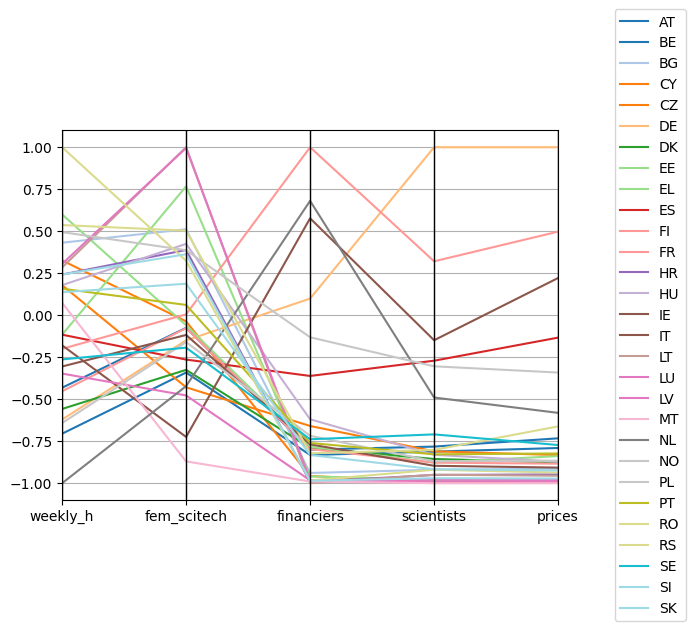

In [12]:
(pd
 .plotting
 .parallel_coordinates(merged_stats.drop(columns=['financiers_log','scientists_log','prices_log','east_west_g7']).reset_index(),'geo',colormap='tab20')
 .legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
)

In [41]:
merged_stats.drop(columns=['financiers_log','scientists_log','prices_log']).sort_values(['financiers'],ascending=False).iloc[0:6]

,weekly_h,fem_scitech,financiers,scientists,prices,east_west_g7
geo,,,,,,
FR,0.400000,0.502564,1.000000,0.660414,0.748723,G7
NL,0.000000,0.288934,0.840365,0.255054,0.209411,W
IT,0.410526,0.137772,0.788511,0.425531,0.610768,G7
DE,0.189474,0.425074,0.549482,1.000000,1.000000,G7
PL,0.747368,0.693510,0.434395,0.347962,0.329360,E
ES,0.442105,0.367998,0.319263,0.364630,0.433347,W


In [42]:
merged_stats.drop(columns=['financiers_log','scientists_log','prices_log']).sort_values(['prices'],ascending=False).iloc[0:6]

,weekly_h,fem_scitech,financiers,scientists,prices,east_west_g7
geo,,,,,,
DE,0.189474,0.425074,0.549482,1.000000,1.000000,G7
FR,0.400000,0.502564,1.000000,0.660414,0.748723,G7
IT,0.410526,0.137772,0.788511,0.425531,0.610768,G7
ES,0.442105,0.367998,0.319263,0.364630,0.433347,W
PL,0.747368,0.693510,0.434395,0.347962,0.329360,E
NL,0.000000,0.288934,0.840365,0.255054,0.209411,W


In [43]:
merged_stats.drop(columns=['financiers_log','scientists_log','prices_log']).sort_values(['scientists'],ascending=False).iloc[0:6]

,weekly_h,fem_scitech,financiers,scientists,prices,east_west_g7
geo,,,,,,
DE,0.189474,0.425074,0.549482,1.000000,1.000000,G7
FR,0.400000,0.502564,1.000000,0.660414,0.748723,G7
IT,0.410526,0.137772,0.788511,0.425531,0.610768,G7
ES,0.442105,0.367998,0.319263,0.364630,0.433347,W
PL,0.747368,0.693510,0.434395,0.347962,0.329360,E
NL,0.000000,0.288934,0.840365,0.255054,0.209411,W


Spain, Poland, and Netherlands comparable to G7 members

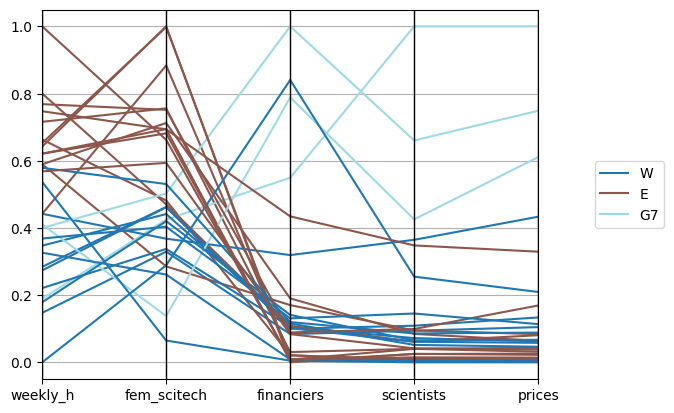

In [40]:
(pd
 .plotting
 .parallel_coordinates(merged_stats.drop(columns=['financiers_log','scientists_log','prices_log']),'east_west_g7',colormap='tab20')
 .legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
)

parallel coordinates crowded for prices and financiers near 0.0-0.2, this corresponds to the bottom left quadrant of the radviz being empty? And likewise busy top right radviz quadrant correspond to the many lines at 0.2-1.0 for weekly hours and females in science and technology. 

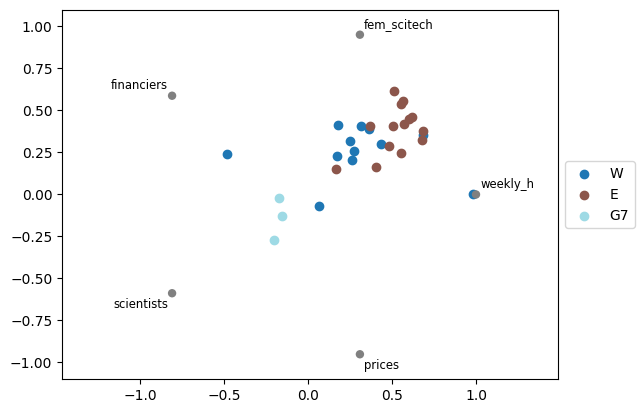

In [13]:
(pd
 .plotting
 .radviz(merged_stats.drop(columns=['financiers_log','scientists_log','prices_log']),'east_west_g7',colormap='tab20')
 .legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
)

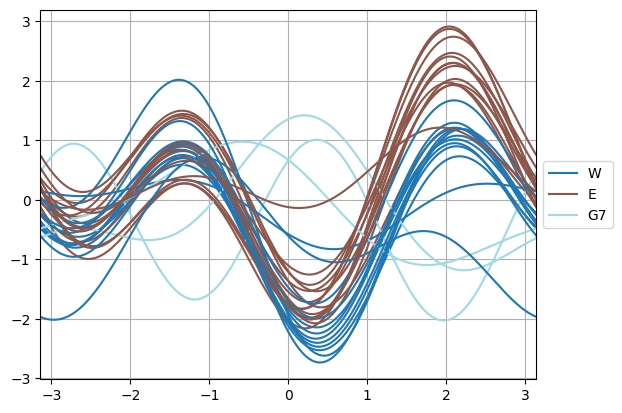

In [14]:
(pd
 .plotting
 .andrews_curves(merged_stats.drop(columns=['financiers_log','scientists_log','prices_log']),'east_west_g7',colormap='tab20')
 .legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
)

> $ f(t) = \frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2t) + x_5 \cos(2t) + \cdots $
Where x coefficients correspond to the values of each dimension
and t is linearly spaced between $ -\pi$ and $+\pi$ .
Each row of frame then corresponds to a single curve.

So the first coefficient is the dc component, the next two the in phase and quadrature component of the fundamental, and the next one the in phase component of the first harmonic. 
- Most countries stuck together, other than G7 and a couple of others

array([[<Axes: xlabel='weekly_h', ylabel='weekly_h'>,
        <Axes: xlabel='fem_scitech', ylabel='weekly_h'>,
        <Axes: xlabel='financiers', ylabel='weekly_h'>,
        <Axes: xlabel='scientists', ylabel='weekly_h'>,
        <Axes: xlabel='prices', ylabel='weekly_h'>],
       [<Axes: xlabel='weekly_h', ylabel='fem_scitech'>,
        <Axes: xlabel='fem_scitech', ylabel='fem_scitech'>,
        <Axes: xlabel='financiers', ylabel='fem_scitech'>,
        <Axes: xlabel='scientists', ylabel='fem_scitech'>,
        <Axes: xlabel='prices', ylabel='fem_scitech'>],
       [<Axes: xlabel='weekly_h', ylabel='financiers'>,
        <Axes: xlabel='fem_scitech', ylabel='financiers'>,
        <Axes: xlabel='financiers', ylabel='financiers'>,
        <Axes: xlabel='scientists', ylabel='financiers'>,
        <Axes: xlabel='prices', ylabel='financiers'>],
       [<Axes: xlabel='weekly_h', ylabel='scientists'>,
        <Axes: xlabel='fem_scitech', ylabel='scientists'>,
        <Axes: xlabel='financier

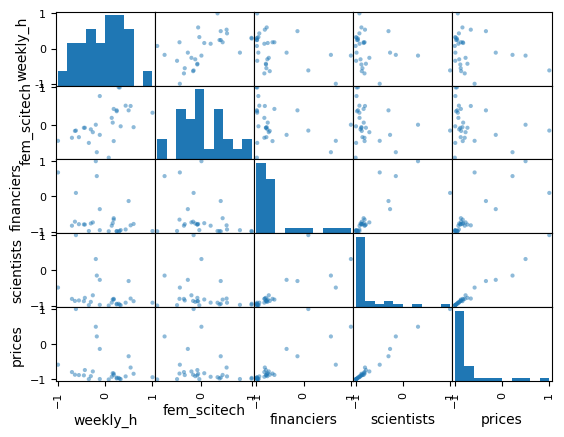

In [17]:
pd.plotting.scatter_matrix(
merged_stats.drop(columns=['east_west_g7','financiers_log','scientists_log','prices_log'])
)

In [18]:
merged_stats.drop(columns=['east_west_g7','financiers_log','scientists_log','prices_log']).corr()

,weekly_h,fem_scitech,financiers,scientists,prices
weekly_h,1.000000,0.525280,-0.382036,-0.312867,-0.281540
fem_scitech,0.525280,1.000000,-0.335678,-0.229587,-0.250826
financiers,-0.382036,-0.335678,1.000000,0.786460,0.804731
scientists,-0.312867,-0.229587,0.786460,1.000000,0.985902
prices,-0.281540,-0.250826,0.804731,0.985902,1.000000


# Log transformation for Financiers and Price Index

see [You're probably overthinking it](https://allendowney.github.io/ProbablyOverthinkingIt/intro.html)

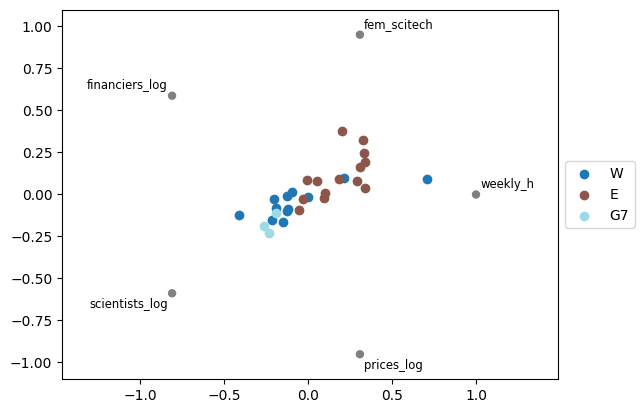

In [19]:
(pd
 .plotting
 .radviz(merged_stats.drop(columns=['financiers','scientists','prices']),'east_west_g7',colormap='tab20')
 .legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
)
#,colors={'W':'tab_bluew','E':'tab_red'}

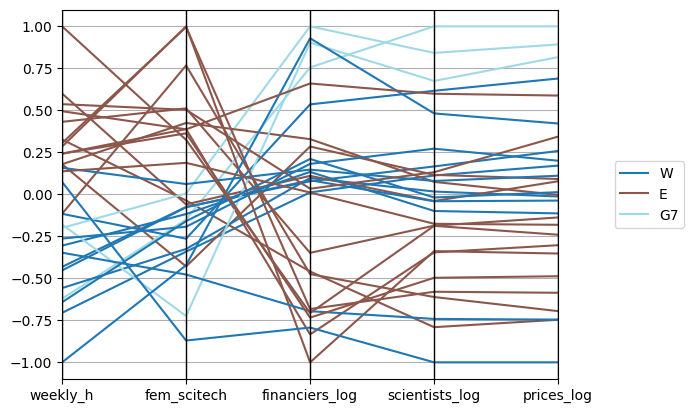

In [20]:
(pd
 .plotting
 .parallel_coordinates(merged_stats.drop(columns=['financiers','scientists','prices']),'east_west_g7',colormap='tab20')
 .legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
)

Parallel coordinates better spread out with log.

In [21]:
merged_stats.sort_values(['prices'],ascending=True).iloc[0:6]

,weekly_h,fem_scitech,financiers,scientists,prices,financiers_log,scientists_log,prices_log,east_west_g7
geo,,,,,,,,,
MT,0.073684,-0.870157,-0.989663,-1.000000,-1.000000,-0.793091,-1.000000,-1.000000,W
CY,0.326316,-0.036658,-0.957045,-0.992040,-0.990701,-0.459377,-0.790673,-0.746469,E
LU,-0.347368,-0.477455,-0.982678,-0.989457,-0.990659,-0.695581,-0.741589,-0.745643,W
EE,-0.115789,0.767106,-0.959190,-0.980754,-0.987922,-0.474709,-0.611231,-0.695120,E
LV,0.305263,0.995495,-0.981621,-0.978182,-0.980579,-0.682638,-0.579881,-0.585937,E
SI,0.242105,0.363195,-0.985612,-0.970256,-0.971843,-0.733776,-0.496785,-0.487446,E


Malta and Luxembourg stand out!

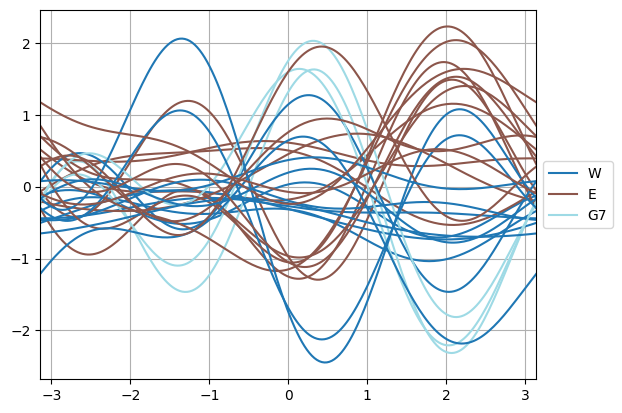

In [22]:
(pd
 .plotting
 .andrews_curves(merged_stats.drop(columns=['financiers','scientists','prices']),'east_west_g7',colormap='tab20')
 .legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
)

Andrews curves better spread out with log.

# Correlations

G7 expensive, and with a lot of people working in finance/insurance. They stand out from the rest and from each other.

Eastern Europe: People work long hours, much higher percentage of women in science and technology. These dimensions form a continuum, most east european countries occupy the top half of the continuum but there is no clear clustering

In [23]:
merged_stats.drop(columns=['east_west_g7','financiers','scientists','prices']).corr()

,weekly_h,fem_scitech,financiers_log,scientists_log,prices_log
weekly_h,1.000000,0.525280,-0.443974,-0.319816,-0.288762
fem_scitech,0.525280,1.000000,-0.418424,-0.221371,-0.229726
financiers_log,-0.443974,-0.418424,1.000000,0.892595,0.881933
scientists_log,-0.319816,-0.221371,0.892595,1.000000,0.991712
prices_log,-0.288762,-0.229726,0.881933,0.991712,1.000000


array([[<Axes: xlabel='weekly_h', ylabel='weekly_h'>,
        <Axes: xlabel='fem_scitech', ylabel='weekly_h'>,
        <Axes: xlabel='financiers_log', ylabel='weekly_h'>,
        <Axes: xlabel='scientists_log', ylabel='weekly_h'>,
        <Axes: xlabel='prices_log', ylabel='weekly_h'>],
       [<Axes: xlabel='weekly_h', ylabel='fem_scitech'>,
        <Axes: xlabel='fem_scitech', ylabel='fem_scitech'>,
        <Axes: xlabel='financiers_log', ylabel='fem_scitech'>,
        <Axes: xlabel='scientists_log', ylabel='fem_scitech'>,
        <Axes: xlabel='prices_log', ylabel='fem_scitech'>],
       [<Axes: xlabel='weekly_h', ylabel='financiers_log'>,
        <Axes: xlabel='fem_scitech', ylabel='financiers_log'>,
        <Axes: xlabel='financiers_log', ylabel='financiers_log'>,
        <Axes: xlabel='scientists_log', ylabel='financiers_log'>,
        <Axes: xlabel='prices_log', ylabel='financiers_log'>],
       [<Axes: xlabel='weekly_h', ylabel='scientists_log'>,
        <Axes: xlabel='fem_scit

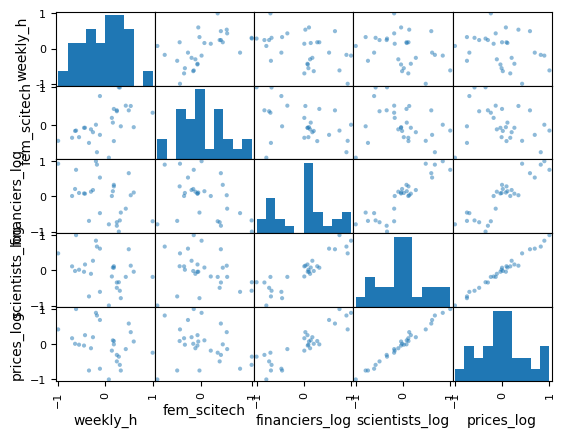

In [24]:
pd.plotting.scatter_matrix(
merged_stats.drop(columns=['east_west_g7','financiers','scientists','prices'])
)

In [26]:
financiers_vs_prices_lreg=stats.linregress(merged_stats['prices_log'],y=merged_stats['financiers_log'])

In [27]:
financiers_vs_prices_lreg

LinregressResult(slope=0.9916743879209692, intercept=-0.009162346640124615, rvalue=0.8819328550633373, pvalue=2.5912874269495623e-10, stderr=0.1020042543930972, intercept_stderr=0.0510366384131093)

In [28]:
scientists_vs_prices_lreg=stats.linregress(merged_stats['prices_log'],y=merged_stats['scientists_log'])

In [29]:
scientists_vs_prices_lreg

LinregressResult(slope=0.9572225497796611, intercept=-0.01726150470693717, rvalue=0.9917120623870678, pvalue=1.3310277147106081e-25, stderr=0.023866127511794427, intercept_stderr=0.011941138410233205)